In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# ✅ 正确的文件名（带下划线）
filename = 'fluorescence_data.csv'


# 检查是否存在
import os
if not os.path.exists(filename):
    raise FileNotFoundError(f"❌ 找不到文件：{filename}")


# 加载数据（第一行是标题，跳过）
data = np.loadtxt(filename, delimiter=',', skiprows=1)
time = data[:, 0]           # 时间（分钟）
fluorescence = data[:, 1]   # 荧光强度（A.U.）


print("✅ 数据加载成功！")
print(f"数据形状：{data.shape} → {data.shape[0]} 行，2 列")
print("前5行数据：")
print(data[:5])

✅ 数据加载成功！
数据形状：(121, 2) → 121 行，2 列
前5行数据：
[[0. 1.]
 [1. 2.]
 [2. 0.]
 [3. 0.]
 [4. 3.]]


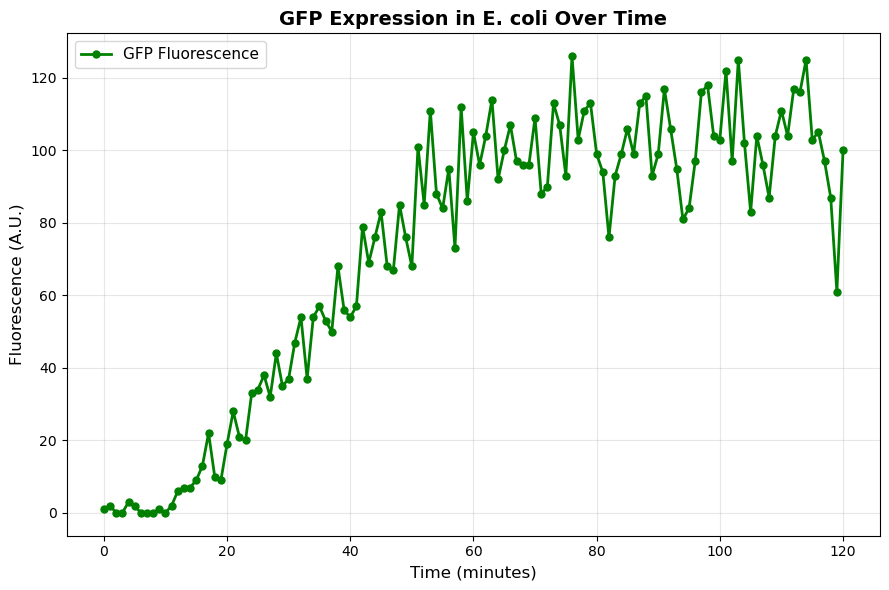

In [2]:
plt.figure(figsize=(9, 6))
plt.plot(time, fluorescence, 'o-', color='green', linewidth=2, markersize=5, label='GFP Fluorescence')


plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Fluorescence (A.U.)', fontsize=12)
plt.title('GFP Expression in E. coli Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

In [3]:
# 1. 最大荧光值
max_fluor = np.max(fluorescence)
print(f"Maximum fluorescence level: {max_fluor:.2f} A.U.")


# 2. 达到最大值的时间
max_time = time[np.argmax(fluorescence)]
print(f"Time at maximum fluorescence: {max_time:.1f} minutes")


# 3. 10 到 60 分钟之间的平均上升速率
# 找出时间在 [10, 60] 分钟范围内的数据
mask = (time >= 10) & (time <= 60)
t_window = time[mask]
f_window = fluorescence[mask]


# 取窗口内第一个和最后一个点
t1, t2 = t_window[0], t_window[-1]
f1, f2 = f_window[0], f_window[-1]
avg_rate = (f2 - f1) / (t2 - t1)


print(f"Average rate of fluorescence increase (10–60 min): {avg_rate:.4f} A.U./min")

Maximum fluorescence level: 126.00 A.U.
Time at maximum fluorescence: 76.0 minutes
Average rate of fluorescence increase (10–60 min): 2.1000 A.U./min
